In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [170]:
X=pd.read_pickle('Assignment3/trainX.pickle')

In [171]:
type(X)

numpy.ndarray

In [172]:
X.shape

(60000, 28, 28)

In [173]:
X[0].shape

(28, 28)

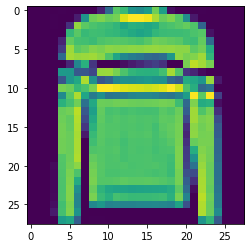

In [174]:
plt.imshow(X[5])

In [175]:
#np.array to dataframe
X=X.reshape(60000,28*28)
train_df=pd.DataFrame(X)

In [176]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
Y=pd.read_pickle('Assignment3/trainY.pickle')

In [178]:
Y.shape

(60000,)

In [179]:
Y=pd.DataFrame(Y)

In [180]:
Y.head()

,0
0,9
1,0
2,0
3,3
4,0


In [181]:
np.unique(Y,return_counts=True)#60000 examples of each class

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [182]:
train_df['labels']=Y

In [183]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [184]:
# split the training and testing data into X (image) and Y (label) arrays

train_data = np.array(train_df, dtype='float32')

In [185]:
x_train=train_data[:,:784]/255

In [186]:
x_train.shape

(60000, 784)

In [187]:
y_train=train_data[:,784]

In [188]:
len(y_train)

60000

In [189]:
y_train

array([9., 0., 0., ..., 3., 0., 5.], dtype=float32)

In [190]:
# split the training data into train and validate arrays (will be used later)

x_train, x_test, y_train, y_test = train_test_split(
    X,Y, test_size=0.2, random_state=1,
)

In [191]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))

x_train shape: (48000, 28, 28, 1)
x_test shape: (12000, 28, 28, 1)


In [192]:
x_train.shape

(48000, 28, 28, 1)

In [25]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam

Using TensorFlow backend.


In [26]:
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [27]:
cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy']
)

In [28]:
cnn_model.fit(
    x_train, y_train, batch_size=batch_size,
    epochs=10, verbose=1,
    validation_data=(x_test, y_test)
#    validation_split=0.1
)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 30s 631us/step - loss: 8.1553 - acc: 0.4513 - val_loss: 3.6484 - val_acc: 0.6489
Epoch 2/10
48000/48000 [==============================] - 26s 537us/step - loss: 1.0939 - acc: 0.7573 - val_loss: 0.4996 - val_acc: 0.8336
Epoch 3/10
48000/48000 [==============================] - 25s 528us/step - loss: 0.4302 - acc: 0.8504 - val_loss: 0.3862 - val_acc: 0.8647
Epoch 4/10
48000/48000 [==============================] - 25s 522us/step - loss: 0.3463 - acc: 0.8778 - val_loss: 0.3520 - val_acc: 0.8777
Epoch 5/10
48000/48000 [==============================] - 26s 532us/step - loss: 0.3024 - acc: 0.8922 - val_loss: 0.3285 - val_acc: 0.8893
Epoch 6/10
48000/48000 [==============================] - 26s 539us/step - loss: 0.2765 - acc: 0.9000 - val_loss: 0.3153 - val_acc: 0.8896
Epoch 7/10
48000/48000 [==============================] - 26s 532us/

In [116]:
# cnn_model.fit(
#     x_train, y_train, batch_size=batch_size,
#     epochs=10, verbose=1,
#     validation_data=(x_test, y_test),
# )

In [118]:
score = cnn_model.evaluate(x_test, y_test, verbose=0)

print('test loss: {:.4f}'.format(score[0]))
print(' test acc: {:.4f}'.format(score[1]))

test loss: 0.2534
 test acc: 0.9100


In [119]:
#to make prediction

In [132]:
df_new=pd.read_pickle('Assignment3/testX.pickle')

In [133]:
df_new.shape

(10000, 28, 28)

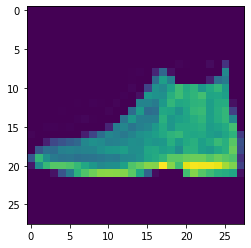

In [134]:
plt.imshow(df_new[0])

In [136]:
X_test_data=df_new.reshape(10000,28,28,1)

In [137]:
X_test_data[1]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 13],
        [ 67],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 50],
        [ 38],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  8],
        [120],
        [209],
        [226],
        [247],
        [237],
        [255],
        [255],
        [255],
        [247],
        [238],
        [235],
        [172],
        [ 72],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [137],
        [239],
        [252],
        [243],
      

In [138]:
X_test_data.shape

(10000, 28, 28, 1)

In [140]:
X_test_data=X_test_data/255

In [141]:
X_test_data[1]

array([[[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [1.99923106e-04],
        [1.03037293e-03],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [7.68935025e-04],
        [5.84390619e-04],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [1.23029604e-04],
        [1.84544406e-03],
        [3.21414840e-03],
        [3

In [142]:
y_output=cnn_model.predict(X_test_data)

In [143]:
y_output.shape

(10000, 10)

In [144]:
ans=np.argmax(y_output[0][:])

In [145]:
ans

6

In [146]:
ans1=np.argmax(y_output[1][:])

In [147]:
y_output[1][:]

array([0.11048803, 0.08133012, 0.09920728, 0.10471397, 0.11306253,
       0.08667149, 0.12664647, 0.08280027, 0.09548253, 0.09959723],
      dtype=float32)

In [148]:
ans1

6

In [149]:
y_output[9999][:]

array([0.11039274, 0.08114925, 0.09898026, 0.10420052, 0.11330006,
       0.08726675, 0.1259945 , 0.08303909, 0.09556975, 0.10010698],
      dtype=float32)

In [150]:
output=[]
for i in range(0,10000):
    output.append(np.argmax(y_output[i][:]))

In [151]:
len(output)

10000

In [152]:
import pickle

In [153]:
with open('output_with_round.pkl', 'wb') as f:
    pickle.dump(output, f)

In [154]:
out=pd.read_pickle('output_with_round.pkl')

In [155]:
len(out)

10000

In [156]:
type(out)

list

In [157]:
output_np=[]
for i in range(0,10000):
    output_np.append(np.argmax(y_output[i][:]))
labels=np.array(output_np)

In [158]:
# with open('output_with_round.pkl', 'wb') as f:
#     pickle.dump(output, f)

In [159]:
with open('testY.pkl','wb') as f:
    pickle.dump(labels, f)     
with open('testY.pkl','rb') as f:
    x = pickle.load(f)
    print(x.shape)

(10000,)


In [198]:
#training on whole train data

In [204]:
X=pd.read_pickle('Assignment3/trainX.pickle')

In [205]:
#np.array to dataframe
X=X.reshape(60000,28*28)
train_df=pd.DataFrame(X)

In [206]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [207]:
Y=pd.read_pickle('Assignment3/trainY.pickle')

In [208]:
Y=pd.DataFrame(Y)

In [209]:
train_df['labels']=Y

In [210]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [211]:
train_data = np.array(train_df, dtype='float32')

In [212]:
x_train=train_data[:,:784]/255

In [213]:
x_train.shape

(60000, 784)

In [214]:
y_train=train_data[:,784]

In [216]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)

print('x_train shape: {}'.format(x_train.shape))

x_train shape: (60000, 28, 28, 1)


In [219]:
cnn_model.fit(
    x_train, y_train, batch_size=batch_size,
    epochs=20, verbose=1,
#     validation_data=(x_test, y_test)
    validation_split=0.1
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 40s 740us/step - loss: 0.3156 - acc: 0.8873 - val_loss: 0.3049 - val_acc: 0.8885
Epoch 2/20
54000/54000 [==============================] - 29s 540us/step - loss: 0.3064 - acc: 0.8918 - val_loss: 0.3012 - val_acc: 0.8927
Epoch 3/20
54000/54000 [==============================] - 28s 524us/step - loss: 0.2988 - acc: 0.8941 - val_loss: 0.2922 - val_acc: 0.8950
Epoch 4/20
54000/54000 [==============================] - 29s 538us/step - loss: 0.2904 - acc: 0.8965 - val_loss: 0.2862 - val_acc: 0.8983
Epoch 5/20
54000/54000 [==============================] - 29s 531us/step - loss: 0.2852 - acc: 0.8977 - val_loss: 0.2819 - val_acc: 0.8983
Epoch 6/20
54000/54000 [==============================] - 29s 531us/step - loss: 0.2788 - acc: 0.9008 - val_loss: 0.2820 - val_acc: 0.8992
Epoch 7/20
54000/54000 [==============================] - 29s 534us/step - loss: 0.2739 - acc: 0.9022 - val_loss: 0.2

In [220]:
df_new=pd.read_pickle('Assignment3/testX.pickle')

In [221]:
df_new.shape

(10000, 28, 28)

In [222]:
X_test_data=df_new.reshape(10000,28,28,1)

In [223]:
X_test_data=X_test_data/255

In [224]:
y_output=cnn_model.predict(X_test_data)

In [225]:
ans=np.argmax(y_output[0][:])

In [226]:
ans

9

In [235]:
testY=[]
for i in range(0,10000):
    testY.append(np.argmax(y_output[i][:]))
labels=np.array(testY)

In [237]:
y_output[0]

array([1.1155709e-06, 2.5885620e-09, 1.2622395e-07, 1.0863077e-08,
       7.9271058e-07, 3.8662346e-03, 3.2113446e-06, 6.8298341e-03,
       1.0024262e-04, 9.8919839e-01], dtype=float32)

In [228]:
labels

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [229]:
with open('test_Y.pkl','wb') as f:
    pickle.dump(labels, f)     
with open('test_Y.pkl','rb') as f:
    x = pickle.load(f)
    print(x.shape)

(10000,)


In [240]:
x[0]

9